<a href="https://colab.research.google.com/github/lizardnote/ML_practice/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_ch3_3%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 이진분류 지표 선택
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = data.data
y = data.target

df= pd.DataFrame(x, columns = data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = 'target'), df['target'], test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 10000, random_state = 42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_prob_org = model.predict_proba(x_test)
print(pd.DataFrame(y_prob_org[:4].round(3)))

       0      1
0  0.139  0.861
1  1.000  0.000
2  0.998  0.002
3  0.001  0.999


In [ ]:
y_pred = model.predict(x_test)
print(pd.DataFrame(y_pred[:4]))

   0
0  1
1  0
2  0
3  1


In [ ]:
import numpy as np

y_pred_ths = (model.predict_proba(x_test)[:,1] >= 0.5).astype(int)
print(np.array_equal(y_pred, y_pred_ths))

True


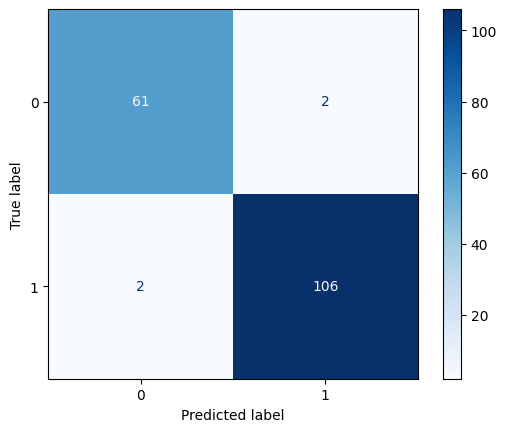

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
isp = ConfusionMatrixDisplay(confusion_matrix = cm)
isp.plot(cmap = plt.cm.Blues)
plt.show();

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



이진 분류 문제에서는 precision_score, recall_score, f1_score, average = 'binary가 디폴트

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1: {f1:.2f}')

accuracy: 0.98
precision: 0.98
recall: 0.98
f1: 0.98


In [ ]:
#positive class(1) 인 경우를 구체적으로 표시할 경우 pos_label을 추가

precision2 = precision_score(y_test, y_pred, pos_label = 1)
recall2 = recall_score(y_test, y_pred, pos_label = 1)
f12 = f1_score(y_test, y_pred, pos_label = 1)

print(f'precision: {precision2:.2f}')
print(f'recall: {recall2:.2f}')
print(f'f1: {f12:.2f}')

precision: 0.98
recall: 0.98
f1: 0.98


In [ ]:
precision3 = precision_score(y_test, y_pred, average = 'macro')
recall3 = recall_score(y_test, y_pred, average = 'macro')
f13 = f1_score(y_test, y_pred, average = 'macro')

print(f'precision: {precision3:.2f}')
print(f'recall: {recall3:.2f}')
print(f'f1: {f13:.2f}')

precision: 0.97
recall: 0.97
f1: 0.97


불균형 데이터인 경우, 정확도보다 민감도, F1스코어가 유의미하다

In [ ]:
#ROC curve

y_pred_ths1 = (model.predict_proba(x_test)[:,1] >= 0.1).astype(int)
y_pred_ths2 = (model.predict_proba(x_test)[:,1] >= 0.9).astype(int)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_ths1)
cm2 = confusion_matrix(y_test, y_pred_ths2)

print(cm1)
print(cm2)

[[ 58   5]
 [  2 106]]
[[63  0]
 [12 96]]


In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test, y_prob)

print(auc_score)

0.9976484420928865


In [ ]:
#다중 분류 문제 혼동 행렬
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

print(f'accuracy: {accuracy:.2f}')
print(f'precision: {precision:.2f}')
print(f'recall: {recall:.2f}')
print(f'f1: {f1:.2f}')

accuracy: 1.00
precision: 1.00
recall: 1.00
f1: 1.00


In [ ]:
accuracy_m = accuracy_score(y_test,y_pred)
precision_m = precision_score(y_test, y_pred, average = 'micro')
recall_m = recall_score(y_test, y_pred, average = 'micro')
f1_m = f1_score(y_test, y_pred, average = 'micro')

print(f'accuracy: {accuracy_m:.2f}')
print(f'precision: {precision_m:.2f}')
print(f'recall: {recall_m:.2f}')
print(f'f1: {f1_m:.2f}')

accuracy: 1.00
precision: 1.00
recall: 1.00
f1: 1.00


In [ ]:
#다중분류 ROC커브 문제
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_score = model.decision_function(x_test)
y_test = label_binarize(y_test, classes = [0,1,2])
n_classes = y_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])

print("AUC for each class")

for i in range(n_classes):
  print(f"Class {i+1}: {roc_auc[i]:.2f}")

AUC for each class
Class 1: 1.00
Class 2: 0.39
Class 3: 1.00


In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(x_test)
auc1, auc2, auc3 = roc_auc_score(y_test, y_score, multi_class = 'ovr', average = None)

print(f"AUC Score (one-vs-Rest, class1 auc) : {auc1:.4f}")
print(f"AUC Score (one-vs-Rest, class2 auc) : {auc2:.4f}")
print(f"AUC Score (one-vs-Rest, class3 auc) : {auc3:.4f}")

AUC Score (one-vs-Rest, class1 auc) : 1.0000
AUC Score (one-vs-Rest, class2 auc) : 0.3894
AUC Score (one-vs-Rest, class3 auc) : 1.0000


In [ ]:
# average = macro 옵션

from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(x_test)
auc = roc_auc_score(y_test, y_prob, multi_class = 'ovr', average = 'macro')
print(f"AUC Score (one-vs-Rest, macro avg) : {auc:.4f}")

AUC Score (one-vs-Rest, macro avg) : 1.0000


In [ ]:
# average = micro 옵션

from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(x_test)
auc = roc_auc_score(y_test, y_prob, multi_class = 'ovr', average = 'micro')
print(f"AUC Score (one-vs-Rest, Micro avg) : {auc:.4f}")

AUC Score (one-vs-Rest, Micro avg) : 1.0000


In [ ]:
# average = micro 옵션

from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(x_test)
auc = roc_auc_score(y_test, y_prob, multi_class = 'ovr', average = 'weighted')
print(f"AUC Score (one-vs-Rest, Micro avg) : {auc:.4f}")

AUC Score (one-vs-Rest, Micro avg) : 1.0000


# 분류 알고리즘

In [ ]:
#data load
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/s13_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/s13_test.csv')

train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,A,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.155400,0.083400,0.1448,...,24.47,37.38,162.70,1872.0,0.1223,0.2761,0.41460,0.15630,0.2437,0.08328
1,B,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,0.1555,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
2,B,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.019670,0.2538,...,11.21,23.17,71.79,380.9,0.1398,0.1352,0.02085,0.04589,0.3196,0.08009
3,A,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
4,A,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,...,17.67,29.51,119.10,959.5,0.1640,0.6247,0.69220,0.17850,0.2844,0.11320


In [ ]:
train_x = train.drop(['diagnosis'], axis=1)
train_y = train['diagnosis']
test_x = test.drop(columns = 'diagnosis')
test_y = test['diagnosis']

In [ ]:
train_y.head()

,diagnosis
0,A
1,B
2,B
3,A
4,A


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_x, train_y)
KNeighborsClassifier


sklearn.neighbors._classification.KNeighborsClassifier

In [ ]:
y_pred = model.predict(test_x)

from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.80      0.89        10
           B       0.91      1.00      0.95        20

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

f1 = f1_score(test_y, y_pred, pos_label = 'A')  #긍정 라벨 선언
print(f'f1: {f1:.2f}')

f1: 0.89


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : [3,5,7,9,11]}
grid_search = GridSearchCV(model, param_grid, cv = 3, scoring = 'f1')
grid_search.fit(train_x, train_y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1')

In [ ]:
print('best_parameter:', grid_search.best_params_)
print('cross-validation f1 score:', grid_search.best_score_)
print(pd.DataFrame(grid_search.cv_results_))

best_parameter: {'n_neighbors': 3}
cross-validation f1 score: nan
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002964      0.000502         0.001414        0.000536   
1       0.002168      0.000044         0.000779        0.000014   
2       0.002258      0.000146         0.000806        0.000029   
3       0.002249      0.000078         0.000802        0.000030   
4       0.002148      0.000031         0.000780        0.000015   

   param_n_neighbors               params  split0_test_score  \
0                  3   {'n_neighbors': 3}                NaN   
1                  5   {'n_neighbors': 5}                NaN   
2                  7   {'n_neighbors': 7}                NaN   
3                  9   {'n_neighbors': 9}                NaN   
4                 11  {'n_neighbors': 11}                NaN   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0                NaN                NaN              NaN             N

In [ ]:
train_y2 = train_y.map({'A' : 1, "B": 0})
test_y2 = test_y.map({'A' : 1, "B": 0})
# 긍정클래스가 A라고 알려줌

In [ ]:
from sklearn.preprocessing import LabelEncoder
labels = ['A', 'B']

labelencoder = LabelEncoder()
encoded_labels = labelencoder.fit_transform(labels)

print('original label:', labels)
print('encoded label:', encoded_labels)
print('classes:', labelencoder.classes_)

original label: ['A', 'B']
encoded label: [0 1]
classes: ['A' 'B']


In [ ]:
#위스콘신 유방암 데이터셋

import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/wisconsin_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/wisconsin_test.csv')

In [ ]:
train_x = train.drop(['diagnosis'], axis=1)
train_y = train['diagnosis']
test_x = test.drop(columns = 'diagnosis')
test_y = test['diagnosis']

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

train_y = labelencoder.fit_transform(train_y)
test_y = labelencoder.transform(test_y)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

num_columns = train_x.select_dtypes('number').columns.tolist()

num_preprocess = make_pipeline(
    StandardScaler(),
    PCA(n_components = 0.8, svd_solver = 'full'))

preprocess = ColumnTransformer([
    ("num", num_preprocess, num_columns)
])

# K-NearestNeighbors (KNN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

full_pipe = Pipeline([
    ("preprocess", preprocess),
    ("classifier", KNeighborsClassifier())

])

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
import numpy as np

knn_param = {'classifier__n_neighbors' : np.arange(5,10,1)}

knn_search = GridSearchCV(estimator = full_pipe,
                          param_grid = knn_param,
                          cv = 3,
                          scoring = 'f1_macro')

knn_search.fit(train_x, train_y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': array([5, 6, 7, 8, 9])},
             scoring='f1_macro')

In [ ]:
print("best parameter : ", knn_search.best_params_)
print('f1 score : ', knn_search.best_score_)

best parameter :  {'classifier__n_neighbors': np.int64(7)}
f1 score :  0.9543004598576802


In [ ]:
from sklearn.metrics import f1_score
knn_pred= knn_search.predict(test_x)

print('f1 score:', f1_score(test_y, knn_pred))

f1 score: 0.9586776859504132


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

full_pipe = Pipeline([
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier())

])

DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dt_param = {'classifier__ccp_alpha' : np.arange(0.01, 0.3, 0.05)}
dt_search = GridSearchCV(estimator = full_pipe,
                         param_grid = dt_param,
                         cv = 5,
                         scoring = 'roc_auc')

dt_search.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__ccp_alpha': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26])},
             scoring='roc_auc')

In [ ]:
print('best parameter: ', dt_search.best_params_)
print('roc_auc score: ', dt_search.best_score_)

best parameter:  {'classifier__ccp_alpha': np.float64(0.01)}
roc_auc score:  0.9363136758151537


In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = dt_search.predict_proba(test_x)[:,1]
auc_score = roc_auc_score(test_y, y_prob)
print('roc_auc score: ', auc_score)


roc_auc score:  0.9617871840094062


# Ensemble

In [ ]:
#1. bagging(bboststrap aggregating)

from sklearn.ensemble import BaggingClassifier

full_pipe = Pipeline([
    ("preprocess", preprocess),
     ("classifier", BaggingClassifier())
])


In [ ]:
BaggingClassifier().get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bag_param = {'classifier__n_estimators' : np.arange(10,100,200)}
bag_search = GridSearchCV(estimator = full_pipe,
                          param_grid = bag_param,
                          cv=5,
                          scoring = 'f1_macro')

bag_search.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier', BaggingClassifier())]),
             param_grid={'classifier__n_estimators': array([10])},
             scoring='f1_macro')

In [ ]:
print('best_parameter', bag_search.best_params_)
print('f1 score', bag_search.best_score_)

best_parameter {'classifier__n_estimators': np.int64(10)}
f1 score 0.937562581107571


In [ ]:
from sklearn.metrics import f1_score
bag_pred = bag_search.predict(test_x)
print('f1 score', f1_score(test_y, bag_pred))

f1 score 0.896


In [ ]:
#randomForest

from sklearn.ensemble import RandomForestClassifier

full_pipe = Pipeline([
    ("preprocess", preprocess),
     ("classifier", RandomForestClassifier())
])

In [ ]:
rf_param = {'classifier__n_estimators' : np.arange(10,500,200)}
rf_search = GridSearchCV(estimator = full_pipe,
                          param_grid = rf_param,
                          cv=3,
                          scoring = 'accuracy')

rf_search.fit(train_x, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__n_estimators': array([ 10, 210, 410])},
             scoring='accuracy')

In [ ]:
print('best parameter : ', rf_search.best_params_)
print('accuracy score : ', rf_search.best_score_)

best parameter :  {'classifier__n_estimators': np.int64(210)}
accuracy score :  0.9548492443229285


In [ ]:
from sklearn.metrics import accuracy_score

rf_pred = rf_search.predict(test_x)
print('accuracy score : ', accuracy_score(test_y, rf_pred))

accuracy score :  0.9415204678362573


In [ ]:
#gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

full_pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', GradientBoostingClassifier())
])


In [ ]:
gb_param = {'classifier__learning_rate': np.arange(0.1, 0.3, 0.05)}
gb_search = GridSearchCV(estimator = full_pipe,
                         param_grid = gb_param,
                         cv = 5,
                         scoring = 'f1_macro')
gb_search.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': array([0.1 , 0.15, 0.2 , 0.25])},
             scoring='f1_macro')

In [ ]:
print('best parameter :', gb_search.best_params_)
print('f1 score :', gb_search.best_score_)

best parameter : {'classifier__learning_rate': np.float64(0.1)}
f1 score : 0.9677399184402319


In [ ]:
from sklearn.metrics import f1_score
gb_pred = gb_search.predict(test_x)
print('f1score : ', f1_score(test_y, gb_pred))

f1score :  0.9302325581395349


# SVM : support vector machine



In [ ]:
from sklearn.svm import SVC

full_pipe = Pipeline([
    ('preprocess', preprocess),
    ('regressor', SVC(probability=True))  # ✅ 꼭 필요!
])


In [ ]:
SVC(probability = True).get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipe = Pipeline([
    ('preprocess', preprocess),
    ('regressor', SVC(probability=True))
])

svc_param = {'regressor__C': np.arange(1, 100, 20)}

svc_search = GridSearchCV(
    estimator=full_pipe,
    param_grid=svc_param,
    cv=3,
    scoring='roc_auc'
)

svc_search.fit(train_x, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('regressor', SVC(probability=True))]),
             param_grid={'regressor__C': array([ 1, 21, 41, 61, 81])},
             scoring='roc_auc')

In [ ]:
print('best parameter:', svc_search.best_params_)
print('roc_auc score:', svc_search.best_score_)

best parameter: {'regressor__C': np.int64(1)}
roc_auc score: 0.9904450454880748


In [ ]:
from sklearn.metrics import roc_auc_score

y_prob = svc_search.predict_proba(test_x)[:,1]
auc_score = roc_auc_score(test_y, y_prob)
print('roc_auc score:', auc_score)


roc_auc score: 0.9941211052322163


# 모범 답안 작성 예시

In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

x = data.data
y = data.target

df = pd.DataFrame(x ,columns = data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df.drop(columns = 'target'), df['target'], test_size = 0.3, random_state = 42)

In [9]:
print(train_x.info())
print(test_x.info())

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 149 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              398 non-null    float64
 1   mean texture             398 non-null    float64
 2   mean perimeter           398 non-null    float64
 3   mean area                398 non-null    float64
 4   mean smoothness          398 non-null    float64
 5   mean compactness         398 non-null    float64
 6   mean concavity           398 non-null    float64
 7   mean concave points      398 non-null    float64
 8   mean symmetry            398 non-null    float64
 9   mean fractal dimension   398 non-null    float64
 10  radius error             398 non-null    float64
 11  texture error            398 non-null    float64
 12  perimeter error          398 non-null    float64
 13  area error               398 non-null    float64
 14  smoothness error         398 

In [11]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size = 0.3, random_state = 1)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)

(194, 30) (194,) (84, 30) (84,)


In [16]:
cat_col = train_x.select_dtypes('object').columns.to_list()
num_col = train_x.select_dtypes('number').columns.to_list()

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')


In [20]:
train_x_cat_encoded = onehotencoder.fit_transform(train_x[cat_col])
valid_x_cat_encoded = onehotencoder.transform(valid_x[cat_col])
test_x_cat_encoded = onehotencoder.transform(test_x[cat_col])


import numpy as np
train_x_preprocessed = np.concatenate([train_x[num_col], train_x_cat_encoded], axis = 1)
valid_x_preprocessed = np.concatenate([valid_x[num_col], valid_x_cat_encoded], axis = 1)
test_x_preprocessed = np.concatenate([test_x[num_col], test_x_cat_encoded], axis = 1)


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x_preprocessed, train_y)
RandomForestClassifier(random_state=1 )

RandomForestClassifier(random_state=1)

In [24]:
from sklearn.metrics import f1_score
pred_val = rf.predict(valid_x)
f1_score(valid_y, pred_val, average = 'macro')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9608148032965325

In [25]:
test_pred = rf.predict(test_x_preprocessed)
test_pred = pd.DataFrame(test_pred, columns = ['pred'])
test_pred.to_csv('submission.csv', index = False)

## K-fold 교차검증 추가하기

In [30]:
train_x_full = np.concatenate([train_x_preprocessed, valid_x_preprocessed], axis = 0)
train_y_full = np.concatenate([train_y, valid_y], axis = 0)


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [10,20,30], 'min_samples_split' : [2,5,10]}
rf = RandomForestClassifier(random_state = 1)
rf_search = GridSearchCV(estimator = rf,
                         param_grid = param_grid,
                         cv = 3,
                         scoring = 'f1_macro')
rf_search.fit(train_x_full, train_y_full)

print(rf_search.best_score_)

0.9608618053873141


In [32]:
test_pred2 = rf_search.predict(test_x_preprocessed)
test_pred2 = pd.DataFrame(test_pred2, columns = ['pred'])
test_pred2.to_csv('result2.csv, index = False')

## columntransformer, pipeline 활용하기

In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
x = data.data
y = data.target

df=  pd.DataFrame(x, columns = data.feature_names)
df['target'] = y

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = 'target'),
                                                    df['target'],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
num_columns = train_x.select_dtypes('number').columns.tolist()

num_preprocess = make_pipeline(
    StandardScaler(),
    PCA(n_components = 0.8, svd_solver = 'full'))

preprocess = ColumnTransformer([
    ("num", num_preprocess, num_columns)
])

In [42]:
from sklearn.ensemble import RandomForestClassifier

full_pipe = Pipeline([
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier())
])

full_pipe.fit(train_x, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.8,
                                                                       svd_solver='full'))]),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   '...
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',
                                                   'concavity error',
                                                   'concave points error',
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('classifier', RandomForestClassifier())])

In [43]:
test_pred3 = full_pipe.predict(test_x)
test_pred3 = pd.DataFrame(test_pred3, columns = ['pred'])


In [45]:
from sklearn.ensemble import RandomForestClassifier

full_pipe = Pipeline([
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier())
])

rf_param = {'classifier__n_estimators' : np.arange(100,500, 100)}
rf_search = GridSearchCV(estimator = full_pipe,
                         param_grid = rf_param
                         , cv = 3, scoring = 'f1_macro')

rf_search.fit(train_x, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['mean '
                                                                          'radius',
                                                                          'mean '
                                                                          'texture',
                                                                          'mean '
                                                                          'perimeter',
                                                                          'mean '
                                                                          'area',
                                                                          'mean '
                                                                          'smoothness',
                                                                          'mean '
                                                                          'compactness',
                                                                          'mean '
                                                                          'concavity',
                                                                          'mean '
                                                                          'concave '
                                                                          'points',
                                                                          'mean '
                                                                          '...
                                                                          'fractal '
                                                                          'dimension '
                                                                          'error',
                                                                          'worst '
                                                                          'radius',
                                                                          'worst '
                                                                          'texture',
                                                                          'worst '
                                                                          'perimeter',
                                                                          'worst '
                                                                          'area',
                                                                          'worst '
                                                                          'smoothness',
                                                                          'worst '
                                                                          'compactness',
                                                                          'worst '
                                                                          'concavity',
                                                                          'worst '
                                                                          'concave '
                                                                          'points',
                          

In [46]:
print(rf_search.best_score_)
print(rf_search.best_params_)

0.927817367029092
{'classifier__n_estimators': np.int64(100)}


In [47]:
test_pred4 = rf_search.predict(test_x)
test_pred4 = pd.DataFrame(test_pred4 ,columns = ['pred'])
test_pred2.to_csv('result.csv', index = False)